# EDA of the audio files

## Libraries

Let's load the libraries for this notebook:
- **Tensorflow datasets** to load the dataset
- **Librosa** to extract audio features (stft, melspectrogram...)
- **Matplotlib** to plot the audio features

In [1]:
import tensorflow_datasets as tfds

import librosa
import librosa.display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Tensorflow datasets: {tfds.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Tensorflow datasets: 4.3.0
Librosa: 0.8.0
Numpy: 1.19.5
Matplotlib: 3.4.2


Let's set the seed for the Tensorflow dataset.

In [3]:
config = tfds.ReadConfig(try_autocache=True, shuffle_seed=42)

## Tensorflow Dataset

Let's [load](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) the custom [Tensorflow dataset](https://www.tensorflow.org/datasets/overview) that I have created for these notebooks. The dataset has two splits: train and test

To create a custom Tensorflow dataset, we need two files (*pump* folder): the file for the class definition and the __init__.py file. For more information about how to create a custom Tensorflow dataset, check this [guide](https://www.tensorflow.org/datasets/add_dataset). 

In [4]:
import pump

data_dir = "../dataset"

(train, test), info = tfds.load(
    "pump",
    split=["train", "test"],
    data_dir=data_dir,
    with_info=True,
    shuffle_files=True,
    read_config=config,
)

Let's see what info the dataset has:
- **audio** holds the numpy array 
- **audio/id** is number of the audio
- **audio/machine** (00, 02, 04, 06) is the number of the pump
- **audio/split** can be train or test
- **label** can be normal or anomaly

In [5]:
print(info.features)

FeaturesDict({
    'audio': Audio(shape=(160000,), dtype=tf.int64),
    'audio/id': Text(shape=(), dtype=tf.string),
    'audio/machine': Text(shape=(), dtype=tf.string),
    'audio/split': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


## Plots

Let's plot some audio features (waveplot, linear-frequency power spectrogram, log-frequency power spectrogram and mel spectrogram) for an audio sample of the train set and two audio samples (one normal and another anomaly) of the test set for each machine. 

In [6]:
def print_plot(audio_sample, color):
    y = list(audio_sample)[0]["audio"].numpy() / 2**15
    sr = 16_000

    fig, ax = plt.subplots(1, 4, figsize=(24, 2))

    librosa.display.waveplot(y, sr=sr, ax=ax[0], color=color)
    ax[0].set(title=f"Waveplot")
    ax[0].set_ylim([-0.1, 0.1])

    S = np.abs(librosa.stft(y))
    D = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[1])
    ax[1].set(title=f"Linear-frequency power spectrogram")
    fig.colorbar(img, ax=ax[1], format='%+2.0f dB')

    img = librosa.display.specshow(D, y_axis='log', sr=sr, x_axis='time', ax=ax[2])
    ax[2].set(title='Log-frequency power spectrogram')
    fig.colorbar(img, ax=ax[2], format='%+2.0f dB')  

    M = librosa.feature.melspectrogram(S=S**2, sr=sr)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', sr=sr, fmax=8000, ax=ax[3])
    ax[3].set(title=f"Mel spectrogram")
    fig.colorbar(img, ax=ax[3], format='%+2.0f dB')

### Machine_id=00

audio audio/id audio/machine  \
0  [-8, 120, 280, -2, -126, -161, -249, 58, 123, ...  b'0043'         b'00'   
1  [103, 399, 469, 650, 331, -35, 194, 352, 528, ...  b'0003'         b'00'   
2  [-446, -366, -739, -1132, -989, -837, -908, -9...  b'0085'         b'00'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

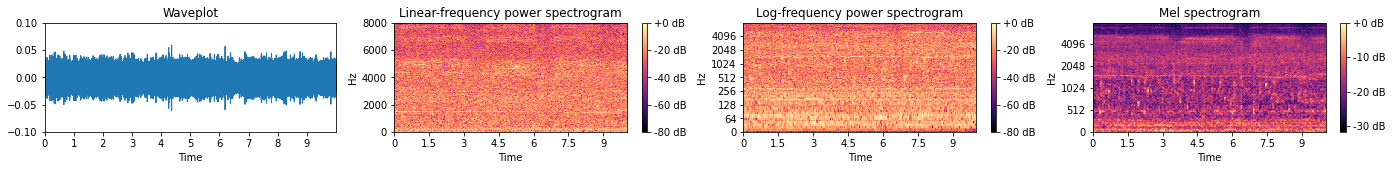

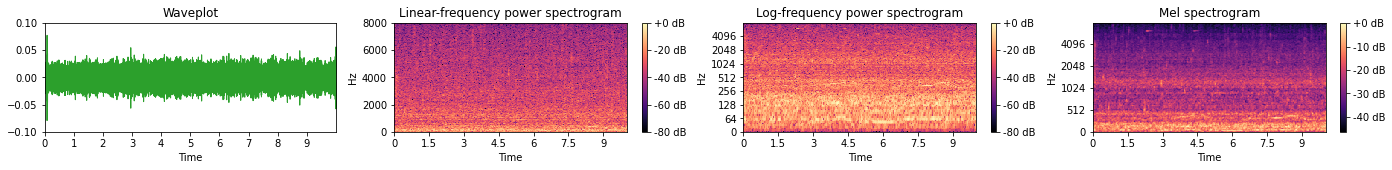

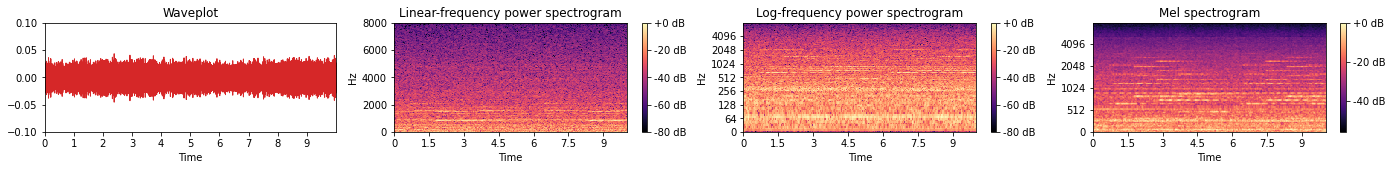

In [7]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0)  # Equivalent to []

machine_id = "00"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=02

audio audio/id audio/machine  \
0  [-80, 110, 2, -141, 138, -8, -90, -116, -92, -...  b'0071'         b'02'   
1  [-332, -442, -252, -199, -256, -46, 188, 345, ...  b'0024'         b'02'   
2  [314, 376, 342, 106, 2, 178, 402, 370, 143, 22...  b'0029'         b'02'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

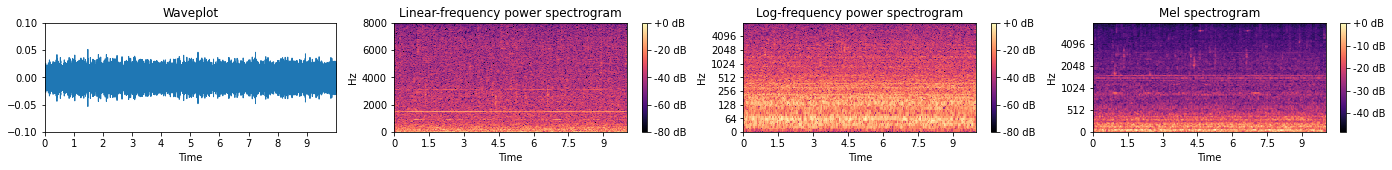

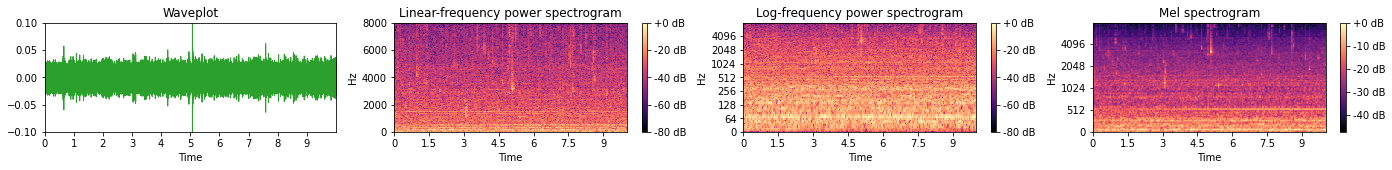

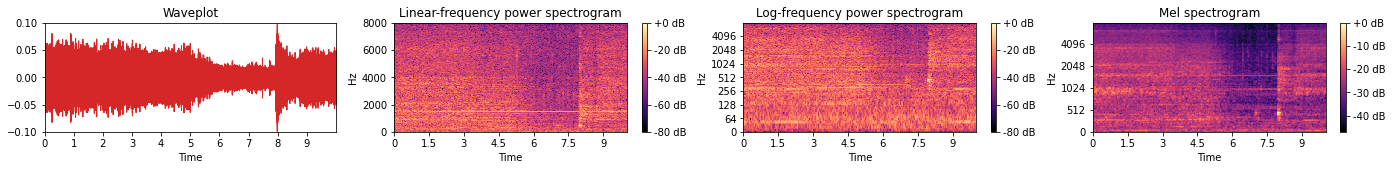

In [8]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "02"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=04

audio audio/id audio/machine  \
0  [-151, 225, 432, 461, 221, 87, 121, 169, 434, ...  b'0082'         b'04'   
1  [371, -435, -442, 41, -811, -354, 749, 751, 31...  b'0024'         b'04'   
2  [-160, -566, -395, -693, -724, -254, -44, 186,...  b'0053'         b'04'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

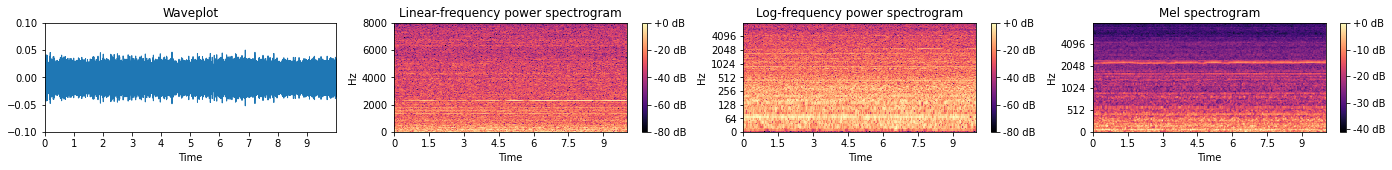

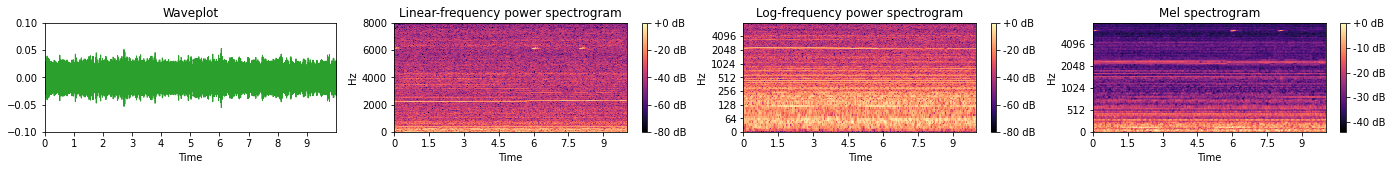

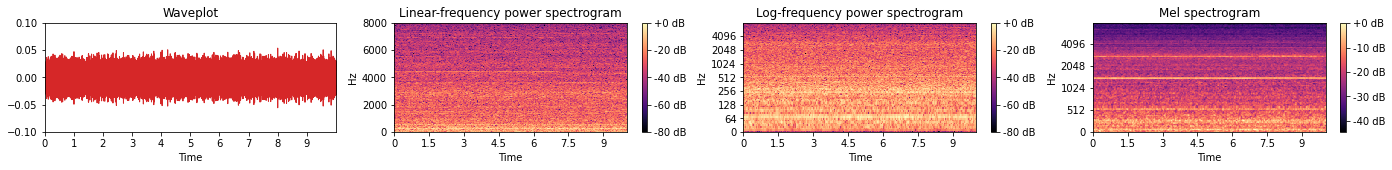

In [9]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "04"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=06

audio audio/id audio/machine  \
0  [215, 269, 234, 292, 278, 157, 117, -30, -144,...  b'0505'         b'06'   
1  [-255, -52, -79, -20, 319, 309, 259, 406, 311,...  b'0015'         b'06'   
2  [435, 278, 250, 187, 121, 129, 284, 414, 523, ...  b'0008'         b'06'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

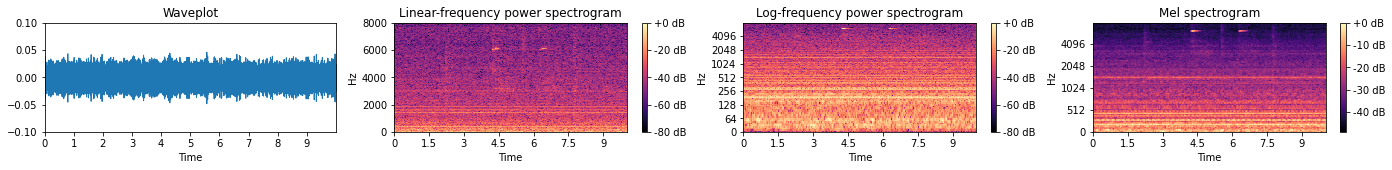

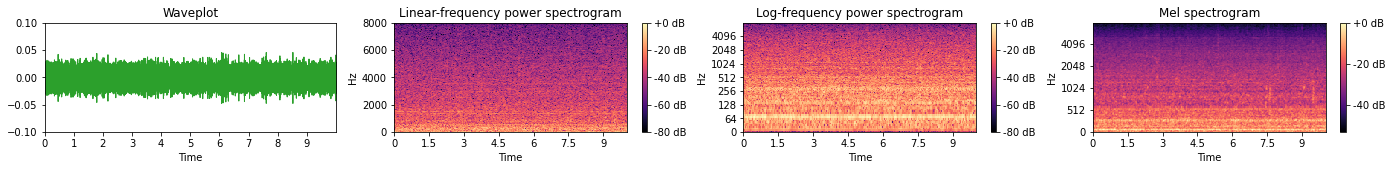

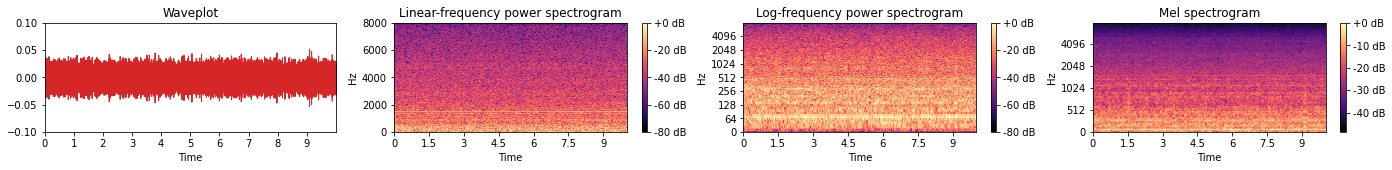

In [10]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "06"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 